In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split

from mpitree.decision_tree import DecisionTreeRegressor

In [2]:
def plot_tree_regr_boundary(regr, X, y, /, *, feature_names=None):
    pass

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

regr = DecisionTreeRegressor()
regr.fit(X_train, y_train)

print(regr)

train_score, test_score = regr.score(X_train, y_train), regr.score(X_test, y_test)
print(f"\nTrain-Test Accuracy: ({train_score:.2%}, {test_score:.2%})")

┌── sepal length (cm)
│  ├── sepal width (cm) [< 5.45]
│  │  ├── sepal length (cm) [< 2.80]
│  │  │  └── 0 [< 4.70]
│  │  │  └── 1 [>= 4.70]
│  │  ├── sepal length (cm) [>= 2.80]
│  │  │  └── 0 [< 5.35]
│  │  │  └── 0 [>= 5.35]
│  ├── sepal width (cm) [>= 5.45]
│  │  ├── sepal length (cm) [< 3.90]
│  │  │  └── 1 [< 7.05]
│  │  │  └── 2 [>= 7.05]
│  │  └── 0 [>= 3.90]

Train-Test Accuracy: (75.00%, 63.33%)


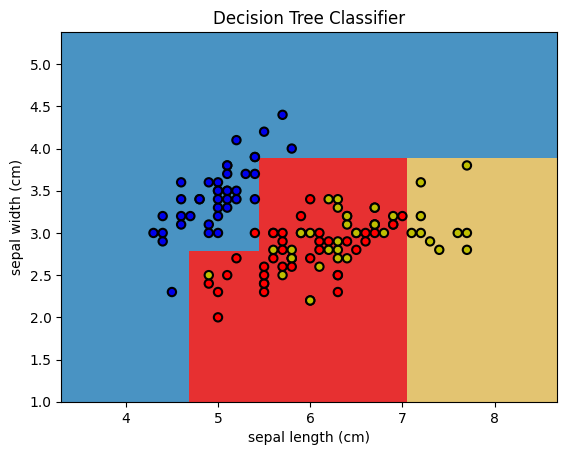

In [5]:
plot_tree_regr_boundary(
    regr,
    X_train,
    y_train,
    feature_names=[""],
)

In [2]:
X = pd.DataFrame(np.random.default_rng().random((50, 2)) * 5, columns=["x_1", "x_2"])
y = pd.DataFrame(np.random.default_rng().choice(50, size=(50,)) * 5, columns=["y"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

In [4]:
regr = DecisionTreeRegressor()
regr.fit(X_train, y_train)

print(regr)
train_score, test_score = regr.score(X_train, y_train), regr.score(X_test, y_test)
print(f"\nTrain-Test Accuracy: ({train_score:.2%}, {test_score:.2%})")

TypeError: can't convert type 'str' to numerator/denominator

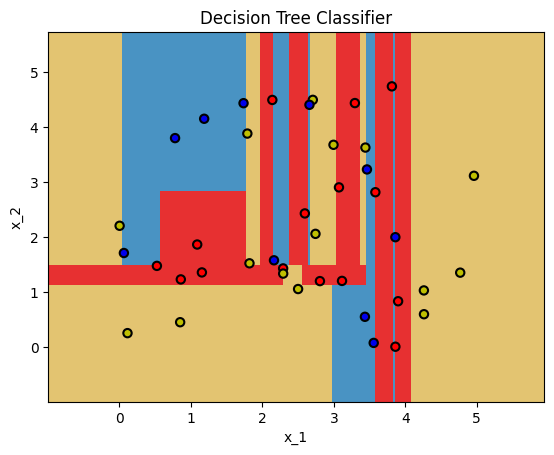

In [9]:
plot_tree_regr_boundary(regr, X_train, y_train, feature_names=["x_1", "x_2"])

In [10]:
size = 4
p = 2
n_ranks = [range(4), range(8)]

for ranks in n_ranks:
    for rank in ranks:
        dist = size // p
        color = rank // dist % p
        key = rank % dist + dist * (rank >= dist * p)

        print(f"Rank={rank}  Color={color}  Key={key}")
    print()

Rank=0  Color=0  Key=0
Rank=1  Color=0  Key=1
Rank=2  Color=1  Key=0
Rank=3  Color=1  Key=1

Rank=0  Color=0  Key=0
Rank=1  Color=0  Key=1
Rank=2  Color=1  Key=0
Rank=3  Color=1  Key=1
Rank=4  Color=0  Key=2
Rank=5  Color=0  Key=3
Rank=6  Color=1  Key=2
Rank=7  Color=1  Key=3

